In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
df.shape

(891, 12)

In [92]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
df.drop('Cabin', axis=1, inplace=True)

In [94]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

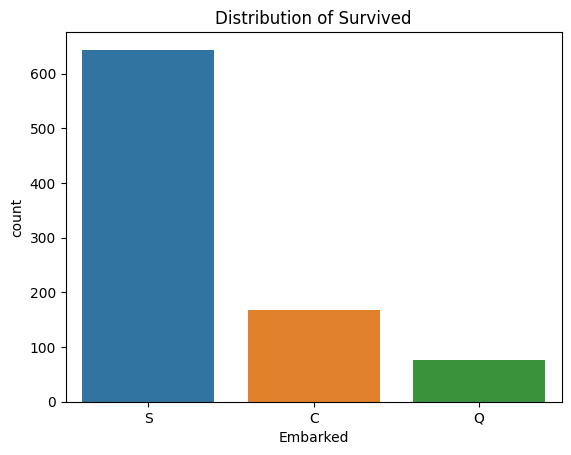

In [95]:
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Survived')
plt.show()


In [96]:
df['Embarked'].fillna('S',inplace=True)

In [97]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [98]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

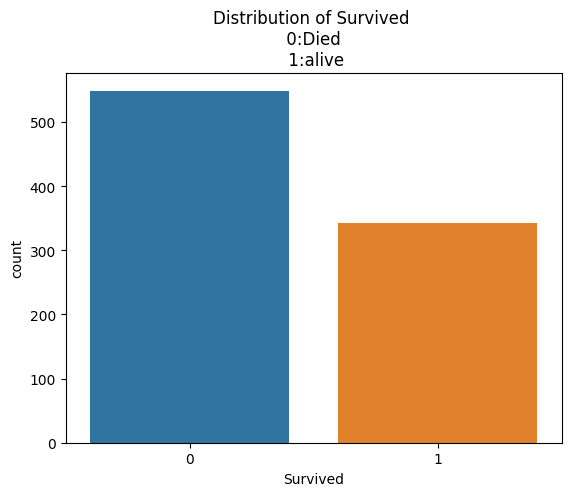

In [99]:
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived \n 0:Died \n 1:alive')
plt.show()

In [100]:
died = (df["Survived"] == 0).sum()
print(died)
survived= (df["Survived"] == 1).sum()
print(survived)

549
342


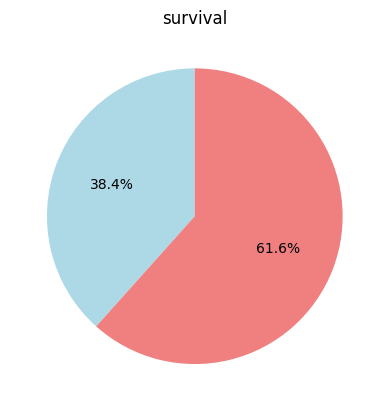

In [101]:
died = (df["Survived"] == 0).sum()
survived= (df["Survived"] == 1).sum()
plt.pie([survived,died], autopct='%1.1f%%', startangle=90, colors=[ 'lightblue','lightcoral'])
plt.title('survival')
plt.show()

In [102]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex:Survived vs Dead')

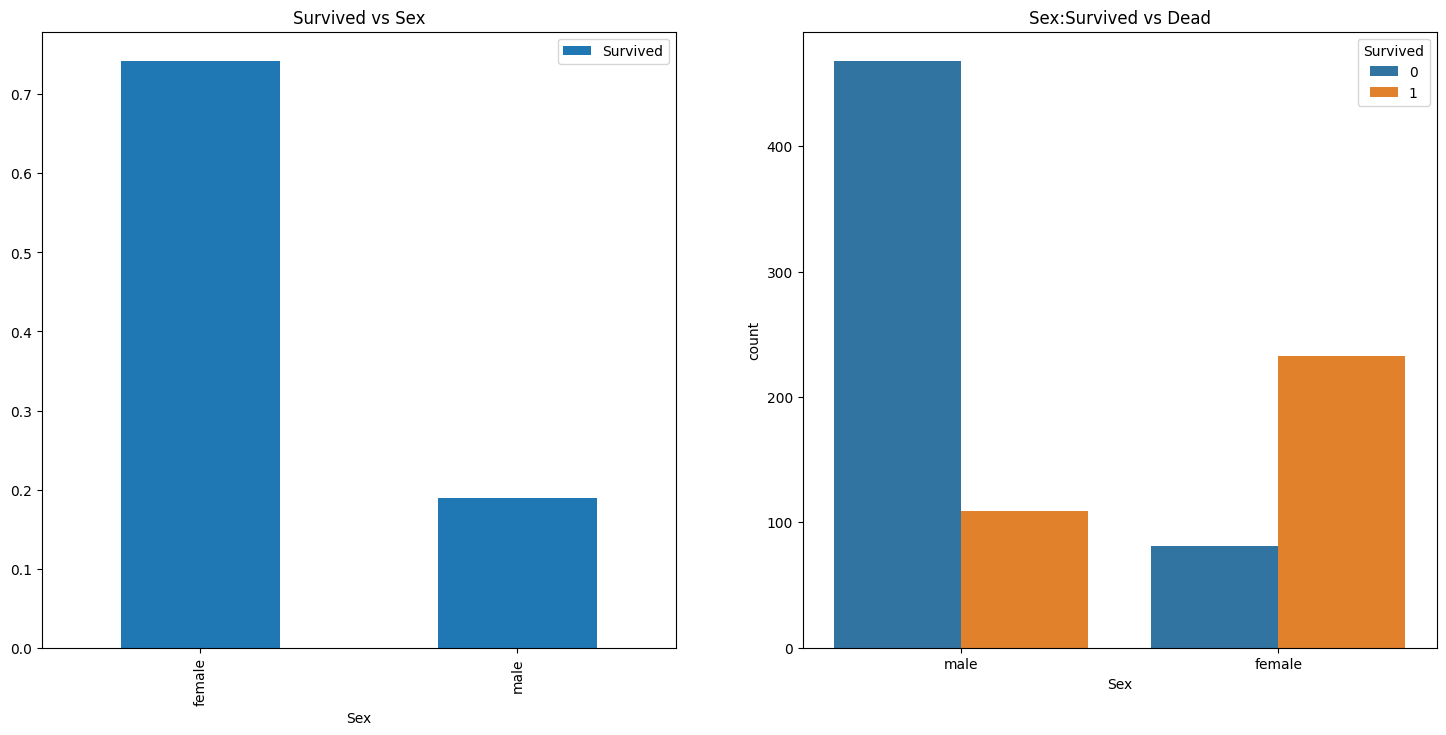

In [103]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot for 'Survived' vs 'Sex'
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar( ax=ax[0])
ax[0].set_title('Survived vs Sex')

# Count plot for 'Sex' with 'Survived' as hue
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')


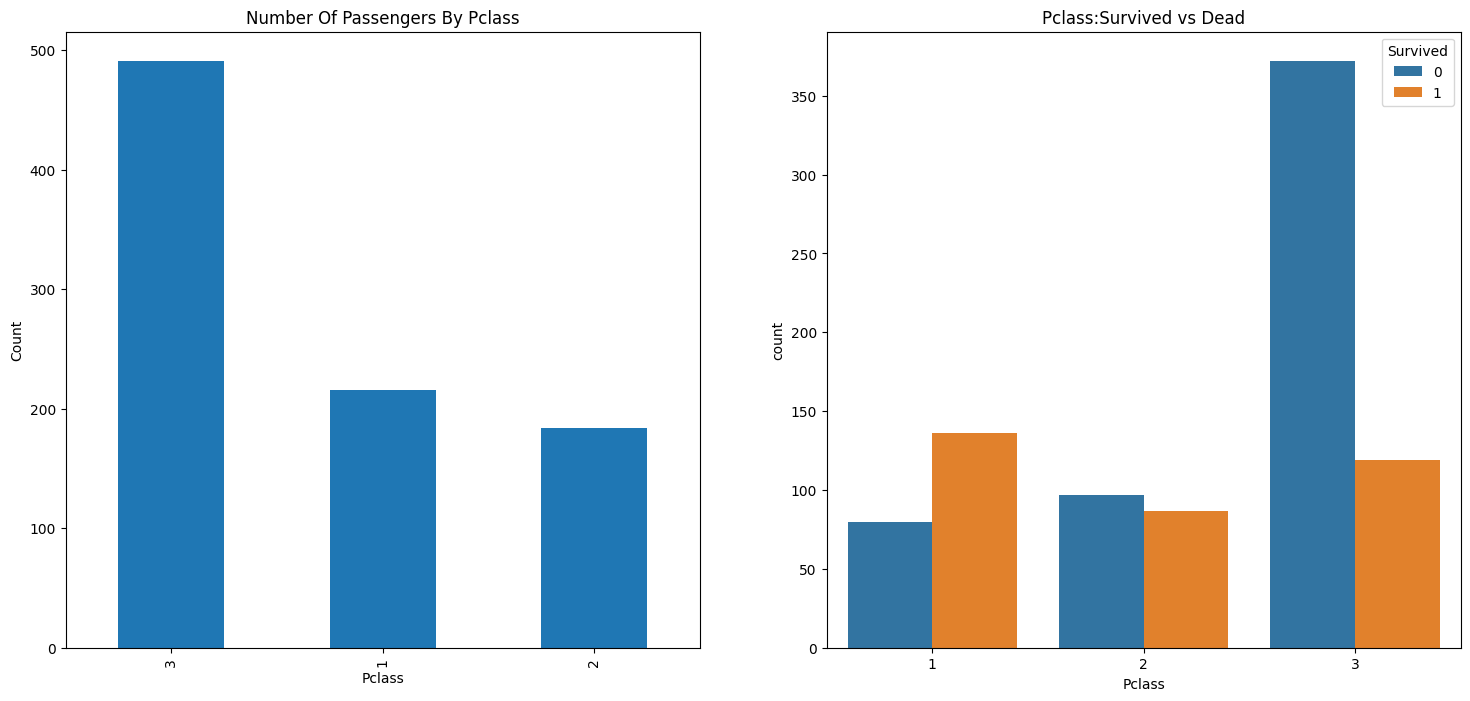

In [104]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

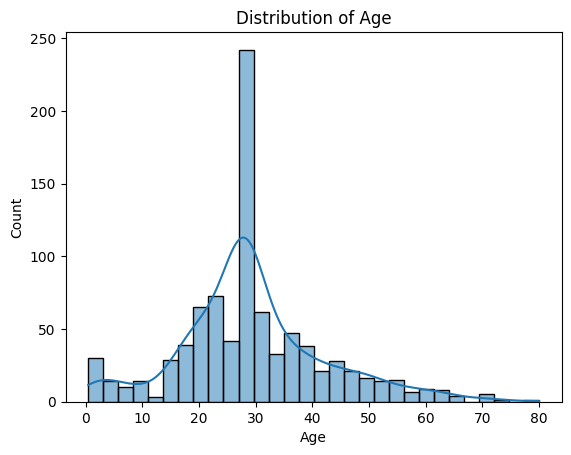

In [105]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

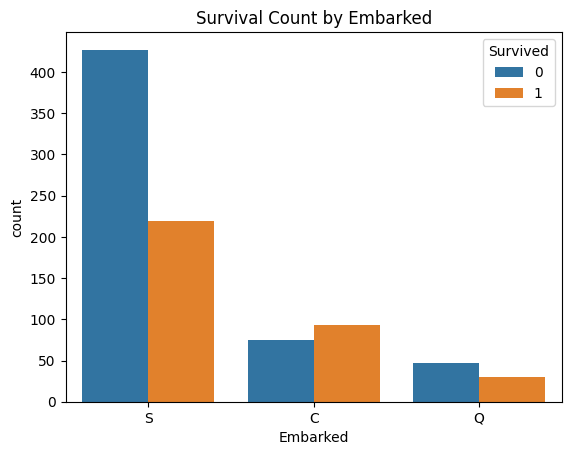

In [106]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked')
plt.show()

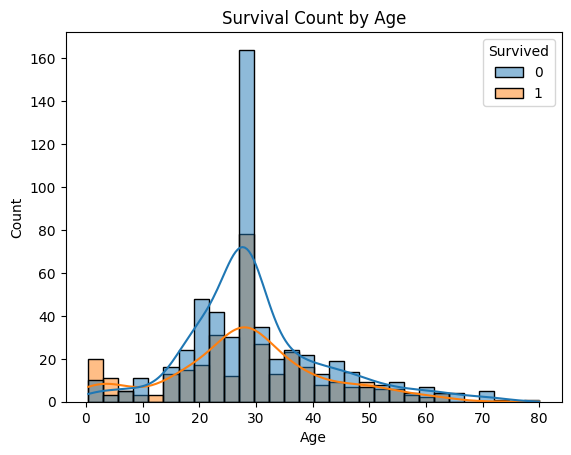

In [107]:
# Explore the relationship between 'Age' and 'Survived'
sns.histplot(x='Age', hue='Survived', data=df, bins=30, kde=True)
plt.title('Survival Count by Age')
plt.show()

